# INTERNSHIP: PR0DIGY INFO TECH

# TASK 02 : MALL CUSTOMER SENGMENTATION DATA

## LIBRARIES

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import pandas as pd
import numpy as np
import warnings


In [ ]:
warnings.filterwarnings('ignore')
drive.mount('/content/drive')
encoder = OneHotEncoder()
scaler = MinMaxScaler()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## LOAD DATASET

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SUMMER_2024/PRODIGY INTERNSHIP/TASK_02/Mall_Customers.csv')

In [ ]:
df.shape

(200, 5)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## DATA CLEANING

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
encoder = OneHotEncoder(sparse=False, drop='first')

In [ ]:
encoded_gender = encoder.fit_transform(df[['gender']])
encoded_gender_df = pd.DataFrame(encoded_gender, columns=encoder.get_feature_names_out(['gender']))
df = pd.concat([df, encoded_gender_df], axis=1)
df.drop('gender', axis=1, inplace=True)

df.head()

,customerid,age,annual income (k$),spending score (1-100),gender_Male
0,1,19,15,39,1.0
1,2,21,15,81,1.0
2,3,20,16,6,0.0
3,4,23,16,77,0.0
4,5,31,17,40,0.0


In [ ]:
df['gender_Male'] = df['gender_Male'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   customerid              200 non-null    int64
 1   age                     200 non-null    int64
 2   annual income (k$)      200 non-null    int64
 3   spending score (1-100)  200 non-null    int64
 4   gender_Male             200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [ ]:
df.drop('customerid', axis = 1, inplace = True)

## EXPLORATORY DATA ANALYSIS EDA

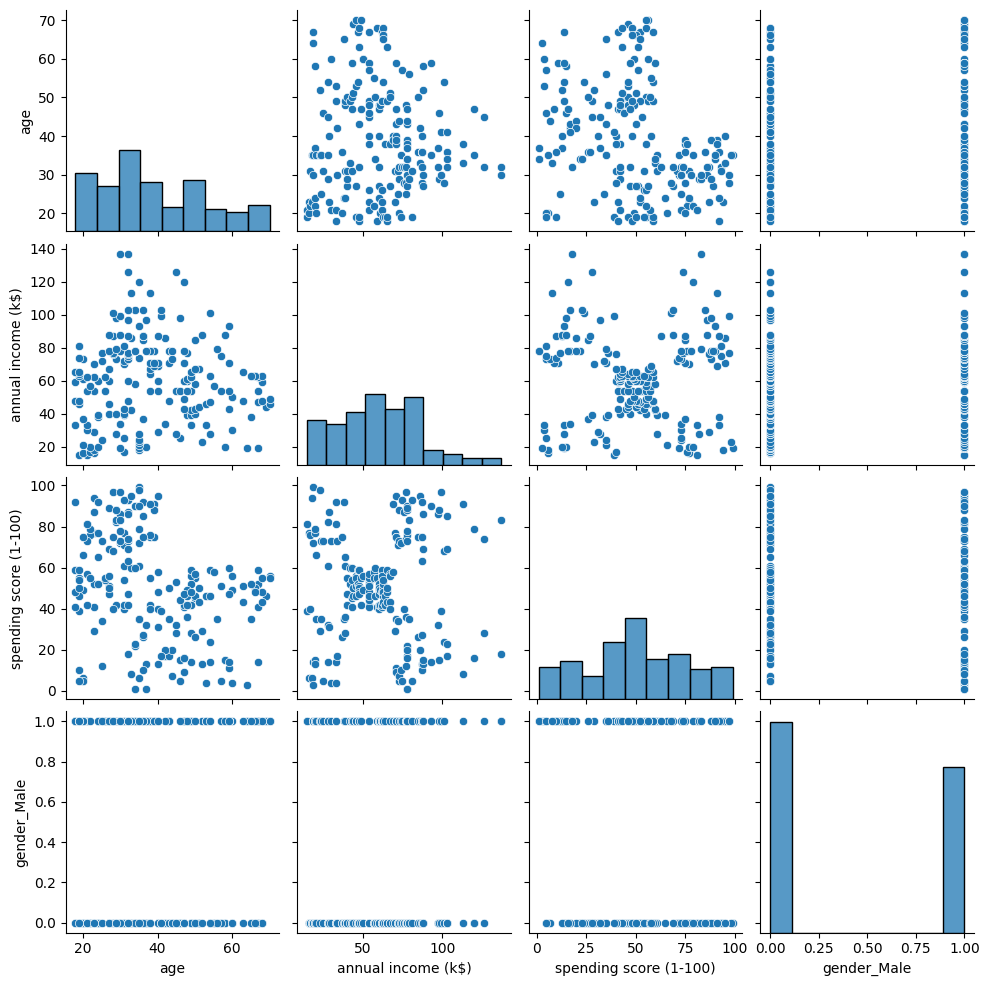

In [ ]:
sns.pairplot(df)

<Axes: ylabel='Count'>

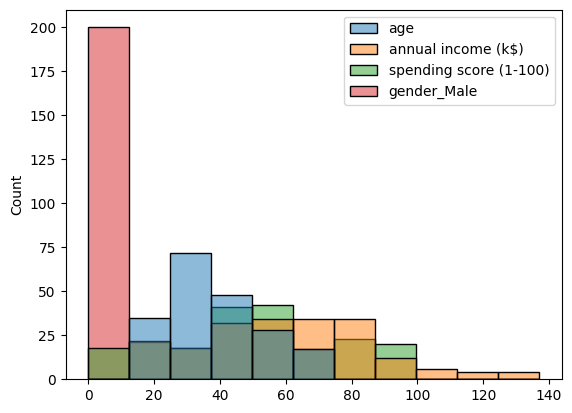

In [ ]:
sns.histplot(df)

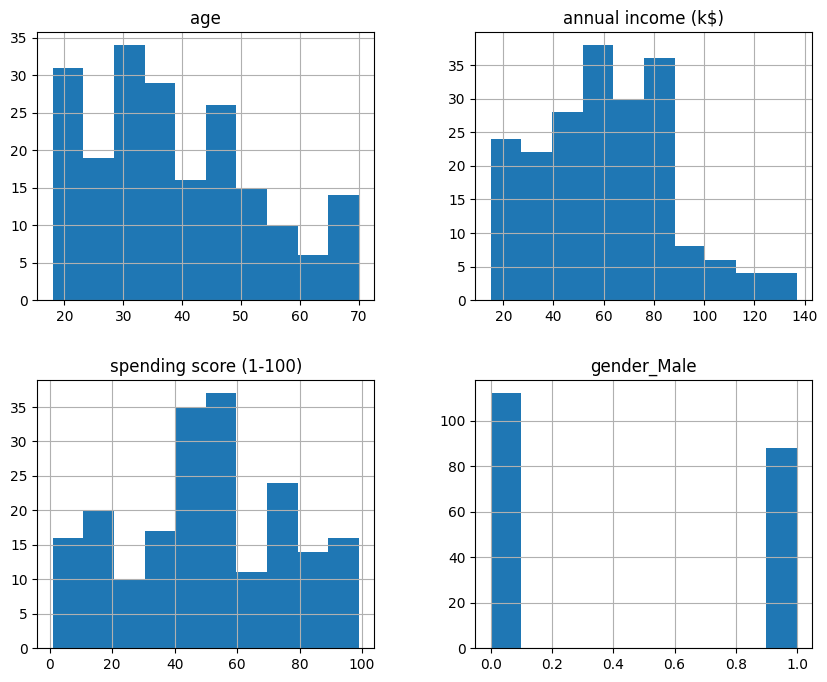

In [ ]:
df.hist(figsize=(10,8))
plt.show()

<Axes: >

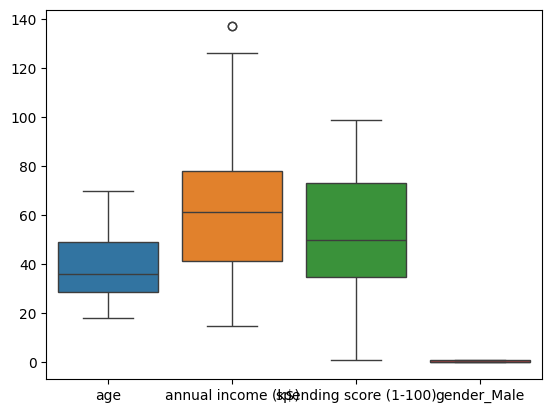

In [ ]:
sns.boxplot(df)

## DATA PRE-PROCESSING

In [ ]:
power = PowerTransformer()

In [ ]:
columns = list(df.columns)
columns[:3]

['age', 'annual income (k$)', 'spending score (1-100)']

In [ ]:
df[columns[:3]] = power.fit_transform(df[columns[:3]])

In [ ]:
data = df.values

## CLUSTERING

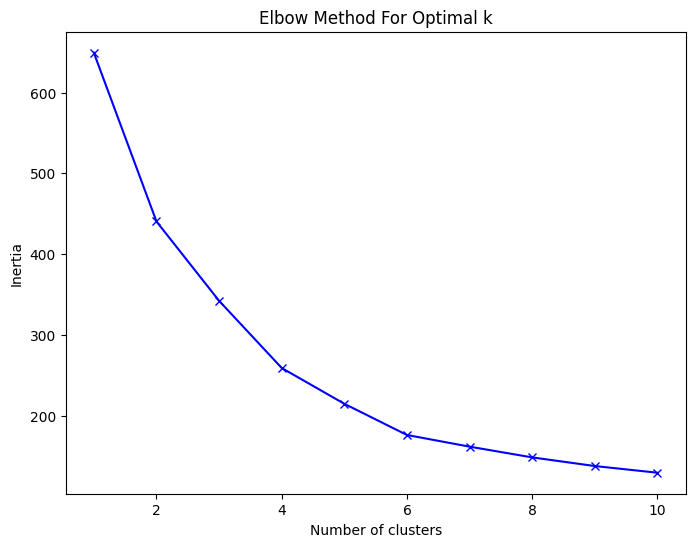

In [ ]:
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1,11), inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42, max_iter = 330)
kmeans.fit(df)

KMeans(max_iter=330, n_clusters=5, random_state=42)

In [ ]:
labels = kmeans.labels_
df['cluster'] = labels

In [ ]:
df.head()

,age,annual income (k$),spending score (1-100),gender_Male,cluster
0,-1.718993,-1.989930,-0.385308,1,4
1,-1.470002,-1.989930,1.164467,1,4
2,-1.591912,-1.930366,-1.820424,0,1
3,-1.240020,-1.930366,1.023549,0,4
4,-0.461118,-1.872032,-0.346103,0,1


<Axes: >

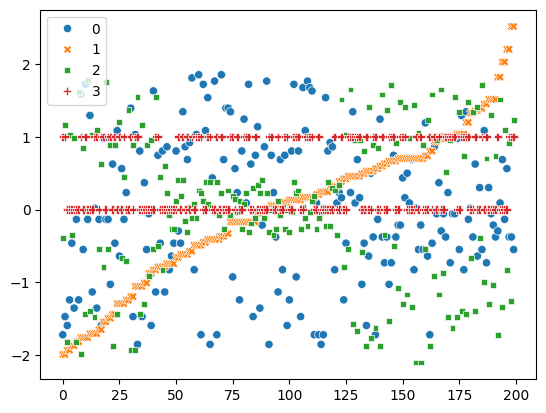

In [ ]:
sns.scatterplot(data)

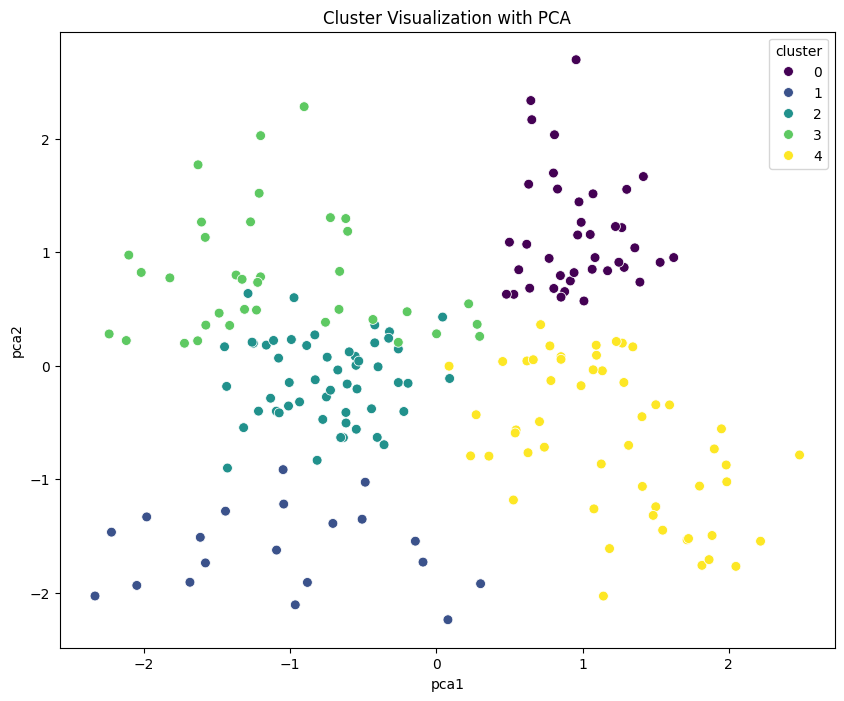

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)
df['pca1'] = pca_data[:, 0]
df['pca2'] = pca_data[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='viridis', s=50)
plt.title('Cluster Visualization with PCA')
plt.show()